In [39]:
import numpy as np
import pandas as pd
from decimal import Decimal
import matplotlib.pyplot as plt

In [40]:
#Importing csv file with already calculated returns
StockReturns = pd.read_csv('BIGRETURNS.csv')
#Adjusting towards our own prefferences, also avoiding mistakes by chosing format of datetime
StockReturns['Date'] = pd.to_datetime(StockReturns['Date'], format='%d/%m/%Y')

In [49]:
# The idea about using DF instead of hard coding, and eliminating Date ?
StockReturnValues = StockReturns.loc[:, StockReturns.columns !='Date']

In [42]:
StockReturns.tail()

,Date,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
246,2017-12-22,0.000000,0.000117,0.001431,-0.006664,-0.003524,-0.005448,0.001717,-0.001409,0.001543
247,2017-12-26,-0.025370,-0.001286,0.000119,-0.000214,-0.004002,0.007190,0.002877,-0.006828,0.003082
248,2017-12-27,0.000176,0.003630,-0.000953,0.003426,0.001869,0.004674,-0.002869,0.009262,-0.004352
249,2017-12-28,0.002814,0.000117,0.001430,-0.000071,0.005316,0.003248,-0.001151,0.001689,0.007457
250,2017-12-29,-0.010814,-0.002100,-0.004523,-0.005976,-0.007886,-0.014021,0.005184,-0.008206,-0.007657


In [43]:
StockReturnValues.tail()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
246,0.000000,0.000117,0.001431,-0.006664,-0.003524,-0.005448,0.001717,-0.001409,0.001543
247,-0.025370,-0.001286,0.000119,-0.000214,-0.004002,0.007190,0.002877,-0.006828,0.003082
248,0.000176,0.003630,-0.000953,0.003426,0.001869,0.004674,-0.002869,0.009262,-0.004352
249,0.002814,0.000117,0.001430,-0.000071,0.005316,0.003248,-0.001151,0.001689,0.007457
250,-0.010814,-0.002100,-0.004523,-0.005976,-0.007886,-0.014021,0.005184,-0.008206,-0.007657


In [44]:
#Defining our weighting of individual stock in  the portfolio 
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

In [45]:
# Calculate the weighted stock returns
WeightedReturns = StockReturnValues.mul(portfolio_weights, axis=1)

In [46]:
# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

In [47]:
StockReturns['Portfolio'].head()

0    0.008082
1    0.000161
2    0.003448
3    0.004660
4   -0.001372
Name: Portfolio, dtype: float64

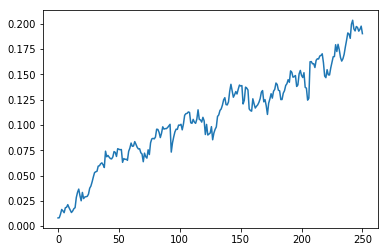

In [48]:
# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.show()